# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set bitcoin and ethereum holdings
my_btc = 1.2  
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?format=json"

In [5]:
# Fetch current BTC price
response_btc = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD")

In [6]:
# Fetch current ETH price
response_eth = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD")

In [7]:
# Formatting as json
data_btc = response_btc.json()
data_eth = response_eth.json()

In [8]:
# Add indents to btc json file and output to screen
print(json.dumps(data_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18934312,
            "total_supply": 18934312,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41978.0,
                    "volume_24h": 20412574415,
                    "market_cap": 793333252389,
                    "percentage_change_1h": -0.505222933147193,
                    "percentage_change_24h": 0.858572083608444,
                    "percentage_change_7d": -1.86916833046975,
                    "percent_change_1h": -0.505222933147193,
                    "percent_change_24h": 0.858572083608444,
                    "percent_change_7d": -1.86916833046975
                },
                "CAD": {
                    "price": 52434.7198,
                    "volume_24h": 25497346701.7765,
                 

In [9]:
# Add indents to btc json file and output to screen
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 119227432,
            "total_supply": 119227432,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3133.84,
                    "volume_24h": 13417209749,
                    "market_cap": 372871591153,
                    "percentage_change_1h": -0.338391137368049,
                    "percentage_change_24h": 0.808872460892468,
                    "percentage_change_7d": -3.46754097103802,
                    "percent_change_1h": -0.338391137368049,
                    "percent_change_24h": 0.808872460892468,
                    "percent_change_7d": -3.46754097103802
                },
                "CAD": {
                    "price": 3914.479544,
                    "volume_24h": 16759436697.4759,
             

In [10]:
# Set btc and eth prices to variables
price_btc = data_btc["data"]["1"]["quotes"]["USD"]["price"]
price_eth = data_eth["data"]["1027"]["quotes"]["USD"]["price"]

In [11]:
# Compute current value of crypto portfolio
my_btc_value = price_btc*my_btc
my_eth_value = price_eth*my_eth
crypto_value = my_btc_value + my_eth_value

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"Total balance: ${crypto_value}")

The current value of your 1.2 BTC is $50373.60
The current value of your 5.3 ETH is $16609.35
Total balance: $66982.95199999999


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [15]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [16]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-18", tz="America/New_York").isoformat()

In [17]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [18]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [19]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    end=today,
    limit = 1000,
).df

In [20]:
# Preview DataFrame
df_portfolio.sort_index(ascending = False, inplace = True)
df_portfolio.head()

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2022-01-18 00:00:00-05:00  111.81  111.860  111.470  111.49  7390142.0   
2022-01-14 00:00:00-05:00  112.53  112.545  112.150  112.17  8362916.0   
2022-01-13 00:00:00-05:00  112.60  112.800  112.510  112.80  7925476.0   
2022-01-12 00:00:00-05:00  112.72  112.785  112.580  112.60  6159865.0   
2022-01-11 00:00:00-05:00  112.33  112.630  112.265  112.61  5723770.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2022-01-18 00:00:00-05:00  459.73  459.96  455.31  456.53  95565773.0  
2022-01-14 00:00:00-05:00  461.19  465.09  459.90  464.68  84363989.0  
2022-01-13 00:00:00-05:00  472.21  472.88  463.44  464.54  79071832.0  
2022-01-12 00:00:00-05:00  471.59  473.20  468.94  471.06  58775301.0  
2022-01-11 00:00:00-05:00  465.22  469.85  462.05  469.74  63249917.0

In [21]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.49
Current SPY closing price: $456.53


In [22]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
shares_value = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"Total value: ${shares_value}")

The current value of your 50 SPY shares is $22826.50
The current value of your 200 AGG shares is $22298.00
Total value: $45124.5


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income = 12000

In [24]:
# Consolidate financial assets data
portfolio_values = {
    "amount": [crypto_value, shares_value]}

In [25]:
# Set the asset names
types = ["crypto", "shares"]

In [26]:
# Create the shares DataFrame
df_savings = pd.DataFrame(portfolio_values, index = types)

In [27]:
# Display savings DataFrame
display(df_savings)

,amount
crypto,66982.952
shares,45124.500


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='amount'>

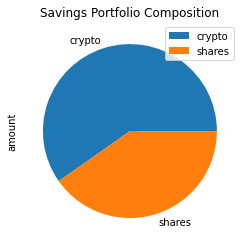

In [28]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Portfolio Composition")

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

In [30]:
# Calculate total amount of savings
total_savings = crypto_value + shares_value

In [31]:
# Use if conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.
def savings(x):
    if x>=emergency_fund:
        print(f"Congratulations! Your savings of ${x} are at a level 3x or more than monthly income.")
    else:
        print(f"Whoops! Your savings of ${x} are ${emergency_fund - x} away from meeting 3x monthly income")

In [32]:
# Validate saving health
savings(total_savings)

Congratulations! Your savings of $112107.45199999999 are at a level 3x or more than monthly income.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-18', tz='America/New_York').isoformat()
today = pd.Timestamp('2022-01-18', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = today,
    limit = 1000,
).df

In [35]:
# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-01-29 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-01-30 00:00:00-05:00  282.59  283.29  281.22  281.66   86366361.0  
2018-01-31 00:00:00-05:00  282.73  283.30  280.68  281.91   76360186.0  
2018-02-01 00:00:00-05:00  281.04  283.06  280.68  281.60   64693558.0  
2018-02-02 00:00:00-05:00  280.08  280.23  275.41  275.52  121717871.0

In [36]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [38]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-29 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-01-30 00:00:00-05:00    -0.001710  282.59  283.29  281.22  281.66   
2018-01-31 00:00:00-05:00     0.000787  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   

                                                     
                                volume daily_return  
time                                                 
2018-01-29 00:00:00-05:00          NaN          NaN  
2018-01-30 00:00:00-05:00   86366361.0          NaN  
2018-01-31 00:00:00-05:00   76360186.0     0.000888  
2018-02-01 00:00:00-05:00   64693558.0    -0.001100  
2018-02-02 00:00:00-05:00  121717871.0    -0.021591

In [39]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/joseph/Desktop/FinTech/financial-planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009516,0.982023,0.991992,1.010782,1.004445,1.006053,0.983267,1.006240,0.987050,1.010142,...,1.013594,0.982852,1.007633,0.992019,0.987361,0.991561,0.995850,0.981257,1.009568,1.021224
2,1.021624,0.986404,0.987392,1.003480,1.015421,0.999025,0.971613,1.000456,0.991151,1.000932,...,1.009571,0.984904,0.995539,0.999226,0.970354,0.991939,0.992391,0.984795,1.005455,1.036693
3,1.024579,1.006072,0.985872,0.992893,1.016550,1.011556,0.960623,1.019166,0.986423,1.004062,...,1.012646,0.999264,0.998250,0.994997,0.966028,0.977399,0.985674,0.979333,1.015378,1.044326
4,1.039137,1.000766,0.991421,0.992240,1.015508,1.007559,0.950912,1.021838,0.991725,1.002794,...,1.012870,1.005496,0.999844,0.995230,0.974695,0.970123,0.990072,0.977437,1.017713,1.051159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.584976,11.673782,12.220002,14.618548,7.064716,15.865960,5.869413,13.111372,13.827796,30.858642,...,62.841983,8.659224,43.236373,10.187845,24.921201,14.034390,4.170931,22.035282,8.886745,21.367348
7557,6.632768,11.569554,12.228294,14.425443,7.150602,15.753260,5.870857,12.967599,13.674627,31.024548,...,62.720540,8.693354,43.738771,10.210583,24.690728,13.928827,4.192651,21.994170,8.837821,21.467800
7558,6.724418,11.505858,12.113628,14.532451,7.143289,15.695195,5.844205,12.922707,13.745047,30.859423,...,62.660768,8.678945,43.960356,10.238352,24.907621,14.054039,4.259970,22.163139,8.985808,21.085130
7559,6.584687,11.638297,12.239302,14.574189,7.160373,15.592712,5.807670,12.817188,13.738926,30.863619,...,63.724587,8.648269,44.429457,10.179075,24.344993,14.090927,4.247977,22.192468,8.998894,21.116809


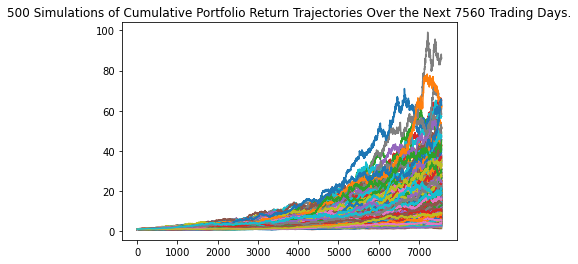

In [45]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

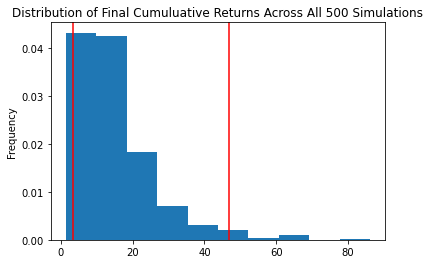

In [47]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             15.298720
std              11.180746
min               1.348514
25%               7.846704
50%              12.730982
75%              19.234657
max              86.177367
95% CI Lower      3.292585
95% CI Upper     46.945993
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")